In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras import Input
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

import tensorflow

import visualkeras

In [3]:
from asyncio.windows_events import NULL


dirname = os.path.join(os.getcwd(), 'imagenes')
imgpath = dirname + os.sep

images = []
directories = []
dircount = []
cant=0
filename=NULL #esto lo pongo por si entra un filename vacio dentro de filanames(no se xq puede pasar)

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            imagen = plt.imread(filepath)
            images.append(imagen)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
    if filename!=NULL and (re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename)):
        print(root, cant)
        directories.append(root)
        dircount.append(cant)
        cant=0
dircount.append(cant)


print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\basket 8823
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\beisball 7752
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\boxeo 7125
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\ciclismo 7533
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\f1 5053
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\futbol 7617
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\golf 9768
c:\Users\Loren\Desktop\Fa

In [6]:

#datos para rellenar=227x227x3-21x28x3= 152823

imagenes_nuevadim=[]

#print(np.shape(images))
#np.reshape(images,(227,227,3))
#print(np.shape(images[0]))
for imagen in images:
    imagen=np.reshape(imagen,(1764))
    aux=np.zeros(152823)
    # print("imagen",np.shape(imagen))
    # print("aux",np.shape(aux))
    imagen=np.append(imagen,aux)
    imagen=np.reshape(imagen,(227,227,3))
    imagenes_nuevadim.append(imagen)
    #imagenes_nuevadim.append(imagen)
    #print(np.shape(imagen))
# print(np.shape(imagenes_nuevadim[0]))
# print(np.shape(imagenes_nuevadim))


ValueError: cannot reshape array of size 119563920 into shape (227,227,3)

In [61]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# np.reshape(y,(227,227,3))
# np.reshape(X,(227,227,3))

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  67780
0 basket
1 beisball
2 boxeo
3 ciclismo
4 f1
5 futbol
6 golf
7 natacion
8 tenis
Total number of outputs :  9
Output classes :  [0 1 2 3 4 5 6 7 8]


In [62]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2) #tomo el 20% para test

print('Training data shape : ', train_X.shape, train_Y.shape) 
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# original y post one-hot encoding
print('Original label:', train_Y[0])
print('Luego de one-hot:', train_Y_one_hot[0])

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13) #datos de validacion, 20% del train

print("Entrenamiento  ",train_X.shape," Validacion",valid_X.shape,train_label.shape,valid_label.shape)

Training data shape :  (54224, 21, 28, 3) (54224,)
Testing data shape :  (13556, 21, 28, 3) (13556,)
Original label: 6
Luego de one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0.]
Entrenamiento   (43379, 21, 28, 3)  Validacion (10845, 21, 28, 3) (43379, 9) (10845, 9)


In [ ]:
modelo = keras.Sequential()
modelo.add(Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(227, 227, 3)))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(3, 3), strides= (2, 2)))
modelo.add(Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
modelo.add(Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
modelo.add(BatchNormalization())
modelo.add(Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
modelo.add(BatchNormalization())
modelo.add(Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
modelo.add(Flatten())
modelo.add(Dense(4096, activation="relu"))
modelo.add(Dropout(0.5))
modelo.add(Dense(10, activation="softmax"))
modelo.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tensorflow.optimizers.SGD(lr=0.001), 
              metrics=['accuracy'])
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


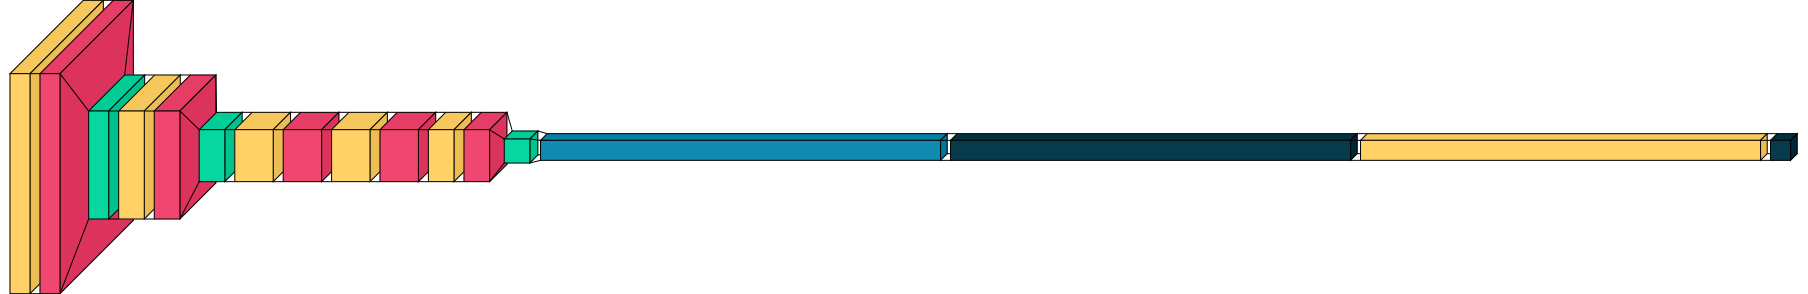

In [ ]:
visualkeras.layered_view(modelo)

In [ ]:
test_eval = modelo.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

ValueError: in user code:

    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 227, 227, 3), found shape=(None, 21, 28, 3)
